In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
import plotly.figure_factory as ff
import plotly.graph_objs as go

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [16, 9]
plt.rcParams["figure.dpi"] = 300
pd.set_option("max_columns", 20)
pd.set_option("max_colwidth", 40)
pd.options.display.float_format = "{:,.2f}".format

%matplotlib inline

In [2]:
case = pd.read_csv("Python_Project_Data.zip/Case.csv")
patient = pd.read_csv("Python_Project_data.zip/PatientInfo.csv")

In [3]:
case.groupby("city")["confirmed"].sum().sort_values(ascending = False)

city
Nam-gu             4511
-                  3625
from other city    1217
Dalseong-gun        297
Seo-gu              151
Gwanak-gu           149
Guro-gu             139
Yongsan-gu          139
Cheongdo-gun        119
Cheonan-si          103
Gyeongsan-si         99
Seongnam-si          94
Bonghwa-gun          68
Bucheon-si           67
Uijeongbu-si         50
Yangcheon-gu         46
Dong-gu              44
Dobong-gu            43
Yechun-gun           40
Anyang-si            39
Sejong               39
Dongnae-gu           39
Chilgok-gun          36
Suwon-si             25
Jung-gu              23
Geochang-gun         18
Gangnam-gu           18
Dongdaemun-gu        17
Jongno-gu            17
Eunpyeong-gu         14
Seongdong-gu         13
Goesan-gun           11
Gumi-si              10
Jinju-si              9
Seosan-si             9
Changnyeong-gun       7
Changwon-si           7
Haeundae-gu           6
Geumcheon-gu          6
Seocho-gu             5
Seodaemun-gu          5
Suyeong-gu 

In [4]:
case.groupby("city")["confirmed"].sum().sort_values(ascending = False).iloc[1:3]/case["confirmed"].sum() * 100

city
-                 31.81
from other city   10.68
Name: confirmed, dtype: float64

### Since city has around 42% confirmed cases that is not classified, we shall use province

In [5]:
case.groupby("province")["confirmed"].sum().sort_values(ascending = False)

province
Daegu                6680
Gyeongsangbuk-do     1324
Seoul                1280
Gyeonggi-do          1000
Incheon               202
Chungcheongnam-do     158
Busan                 156
Gyeongsangnam-do      132
Daejeon               131
Gangwon-do             62
Chungcheongbuk-do      60
Ulsan                  51
Sejong                 49
Gwangju                43
Jeollanam-do           25
Jeollabuk-do           23
Jeju-do                19
Name: confirmed, dtype: int64

In [6]:
case_pivot = case.pivot_table(values = "confirmed",index = "province",columns = "group", aggfunc = "sum")
case_pivot

group              False  True 
province                       
Busan                 85     71
Chungcheongbuk-do     32     28
Chungcheongnam-do     30    128
Daegu               1705   4975
Daejeon               45     86
Gangwon-do            23     39
Gwangju               29     14
Gyeonggi-do          452    548
Gyeongsangbuk-do     345    979
Gyeongsangnam-do      52     80
Incheon               85    117
Jeju-do               18      1
Jeollabuk-do          17      6
Jeollanam-do          22      3
Sejong                 9     40
Seoul                560    720
Ulsan                 35     16

In [8]:
case_pivot = pd.DataFrame(case_pivot.to_records())
case_pivot.rename(columns = {"False": "Group_False","True": "Group_True"}, inplace = True)
case_pivot.set_index("province", inplace = True)

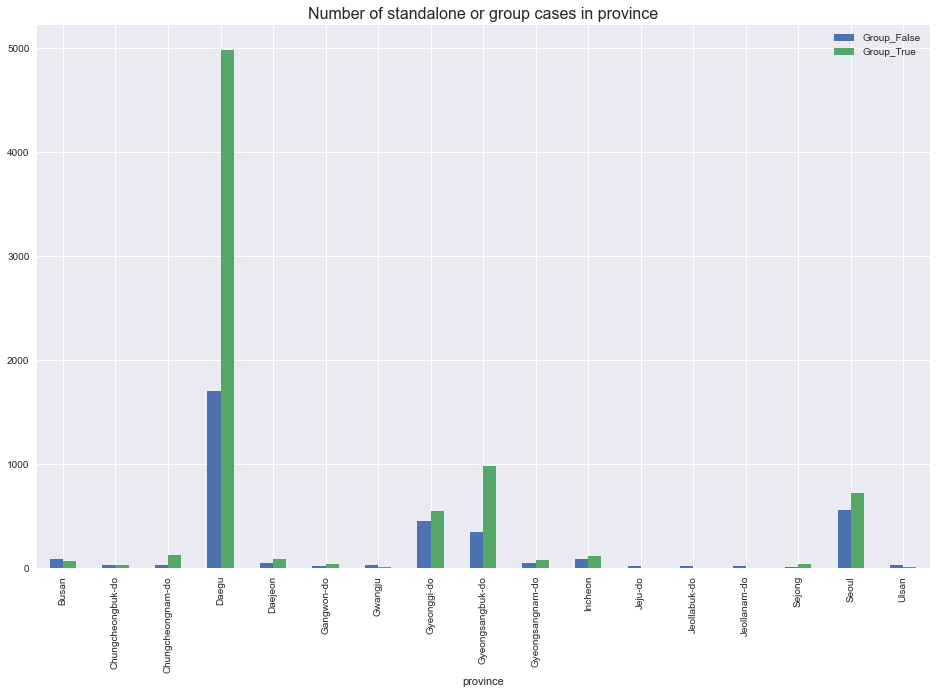

In [9]:
case_pivot.plot(kind = "bar", figsize = (16,10))
plt.title("Number of standalone or group cases in province", fontsize = 16)
plt.show()

In [10]:
print("There are a total of {} individual cases".format(case_pivot["Group_False"].sum()))
print("There are a total of {} group cases".format(case_pivot["Group_True"].sum()))

There are a total of 3544 individual cases
There are a total of 7851 group cases


#### Where are the reported cases located? Are they in group or individual reports?

The majority of the reported cases are located in Daegu province. The virus spreads easily in a group setting.

### Does infection have something to do with gender, age, or geographical location?

In [11]:
patient.head()

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

In [12]:
patient.isna().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

Since we're looking for gender, age and geograhical location, dropping those NaN data for the age group would suffice as it has the highest NaN among these parameters.

In [13]:
patient.dropna(subset = ["age"], inplace = True)

In [14]:
patient.isna().sum()

patient_id               0
sex                      3
age                      0
country                  0
province                 0
city                    89
infection_case         827
infected_by           2824
contact_number        3008
symptom_onset_date    3231
confirmed_date           3
released_date         2209
deceased_date         3719
state                    0
dtype: int64

In [15]:
patient.patient_id.count()

3785

#### We have 3,782 patient info as opposed to 11,395 reported cases in case.csv. Patient info is a small subset of the total number of cases. Let's look into the dataset

In [16]:
pct_gender = patient.groupby("sex")["patient_id"].count()/patient["patient_id"].count()
pct_gender

sex
female   0.55
male     0.45
Name: patient_id, dtype: float64

In [17]:
def plot_bar(df, palette = None):
    fig, ax = plt.subplots(figsize = (8,5))
    sns.barplot(x = df.index, y = df, palette = palette)
    ax.tick_params(axis = "both", labelsize = 15)

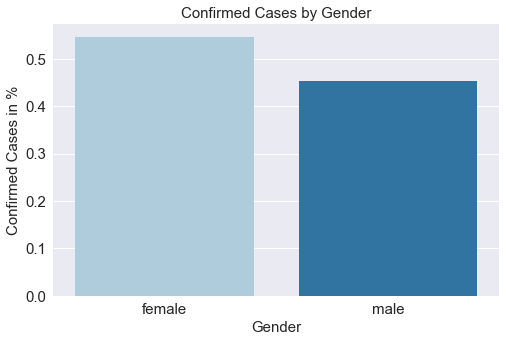

In [18]:
plot_bar(pct_gender, "Paired")
plt.xlabel("Gender", size = 15)
plt.ylabel("Confirmed Cases in %", size = 15)
plt.title("Confirmed Cases by Gender", size = 15)
plt.show()

Gender seems to be even

In [19]:
patient_age = patient.groupby("age")["patient_id"].count().drop(index = "100s").sort_index()
patient_age

age
0s      66
10s    178
20s    899
30s    523
40s    518
50s    667
60s    482
70s    232
80s    170
90s     49
Name: patient_id, dtype: int64

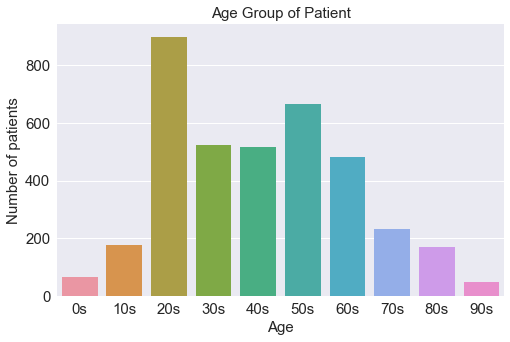

In [20]:
plot_bar(patient_age)
plt.xlabel("Age", size = 15)
plt.ylabel("Number of patients", size = 15)
plt.title("Age Group of Patient", size = 15)
plt.show()

There are many confirmed cases in the 20s age group. This could be probably that they have more social activities like attending university, hanging out with friends and dating.

In [21]:
patient_province = patient.groupby("province")["patient_id"].count()

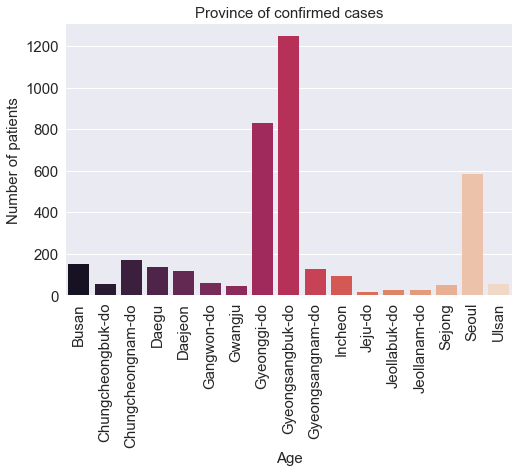

In [22]:
plot_bar(patient_province, "rocket")
plt.xlabel("Age", size = 15)
plt.ylabel("Number of patients", size = 15)
plt.title("Province of confirmed cases", size = 15)
plt.xticks(rotation = 90)
plt.show()

### Patient.csv Data is not a representative of the overall Dataset as Daegu does not have the highest confirmed cases when we compare it to the cases.csv

In [23]:
pd.read_csv("Python_Project_Data.zip/TimeAge.csv").tail()

date  time  age  confirmed  deceased
1084  2020-06-30     0  40s       1681         3
1085  2020-06-30     0  50s       2286        15
1086  2020-06-30     0  60s       1668        41
1087  2020-06-30     0  70s        850        82
1088  2020-06-30     0  80s        556       139

#### Using TimeProvince.csv

In [25]:
province = pd.read_csv("Python_Project_Data.zip/TimeProvince.csv")

In [26]:
province.date = province.date.apply(lambda x: pd.to_datetime(x))

In [27]:
province_latest = province[province.date == max(province.date)]
province_latest

date  time           province  confirmed  released  deceased
2754 2020-06-30     0              Seoul       1312       985         7
2755 2020-06-30     0              Busan        154       142         3
2756 2020-06-30     0              Daegu       6906      6700       189
2757 2020-06-30     0            Incheon        341       290         1
2758 2020-06-30     0            Gwangju         44        32         0
2759 2020-06-30     0            Daejeon        117        44         1
2760 2020-06-30     0              Ulsan         55        50         1
2761 2020-06-30     0             Sejong         50        47         0
2762 2020-06-30     0        Gyeonggi-do       1207       931        23
2763 2020-06-30     0         Gangwon-do         65        54         3
2764 2020-06-30     0  Chungcheongbuk-do         65        60         0
2765 2020-06-30     0  Chungcheongnam-do        167       150         0
2766 2020-06-30     0       Jeollabuk-do         27        21         0
2767 2020-06-30     0       Jeollanam-do         24        19         0
2768 2020-06-30     0   Gyeongsangbuk-do       1389      1328        54
2769 2020-06-30     0   Gyeongsangnam-do        134       128         0
2770 2020-06-30     0            Jeju-do         19        16         0

In [28]:
province_latest.confirmed.sum()

12076

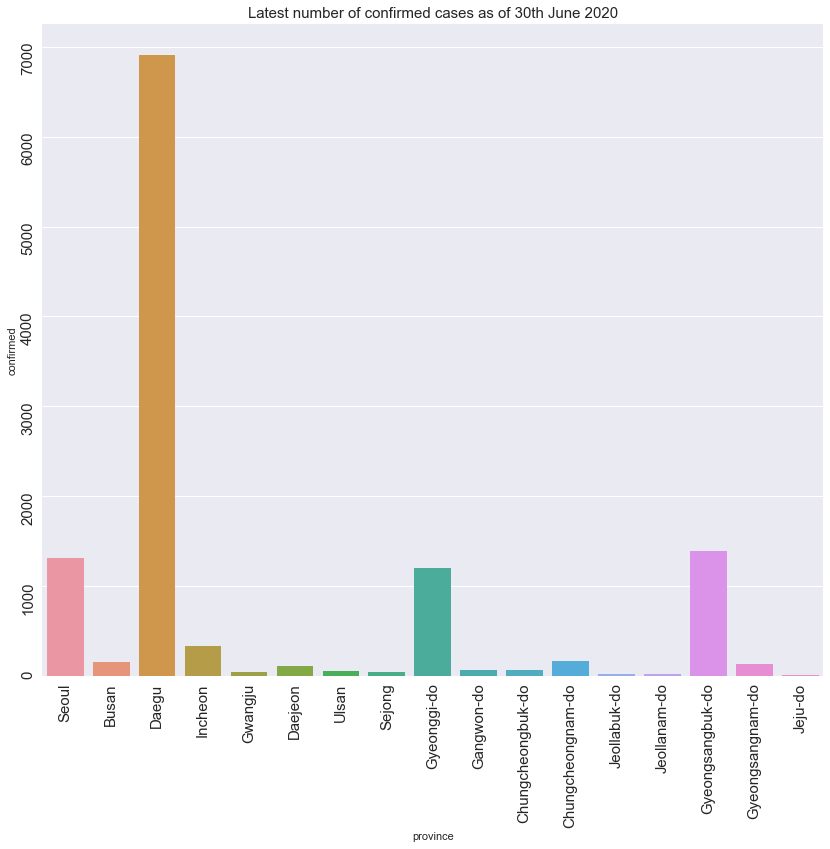

In [29]:
plt.figure(figsize = (14,12))
sns.barplot( x = "province", y = "confirmed", data = province_latest)
plt.title("Latest number of confirmed cases as of 30th June 2020", size = 15)
plt.tick_params(axis = "both", labelsize = 15, labelrotation = 90)

plt.show()

#### TimeProvince Dataset tallies with the cases.csv, not with the patient.csv

#### Using TimeGender.csv

In [30]:
gender = pd.read_csv("Python_Project_Data.zip/TimeGender.csv")
gender.tail()

date  time     sex  confirmed  deceased
237  2020-06-28     0  female       7265       131
238  2020-06-29     0    male       5470       151
239  2020-06-29     0  female       7287       131
240  2020-06-30     0    male       5495       151
241  2020-06-30     0  female       7305       131

In [31]:
gender.date = gender.date.apply(lambda x: pd.to_datetime(x))
gender_latest = gender[gender.date == max(gender.date)]

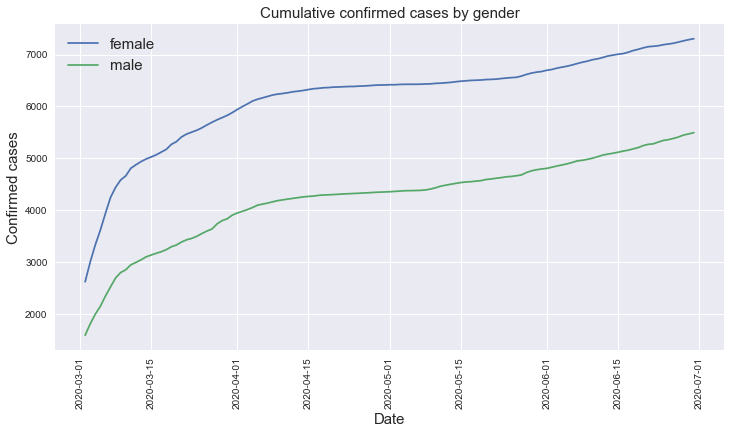

In [32]:
plt.figure(figsize = (12,6))
for group in gender.groupby("sex"):
    plt.plot(group[1].date.values, group[1]["confirmed"].values, label = group[0])
    plt.xticks(rotation = 90)
plt.legend(fontsize = 15)
plt.title("Cumulative confirmed cases by gender", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Confirmed cases", size = 15)
plt.show()

### There seems to be no correlation for gender. Rate of confirmed cases for female spike up early and the rate gradually stabilise

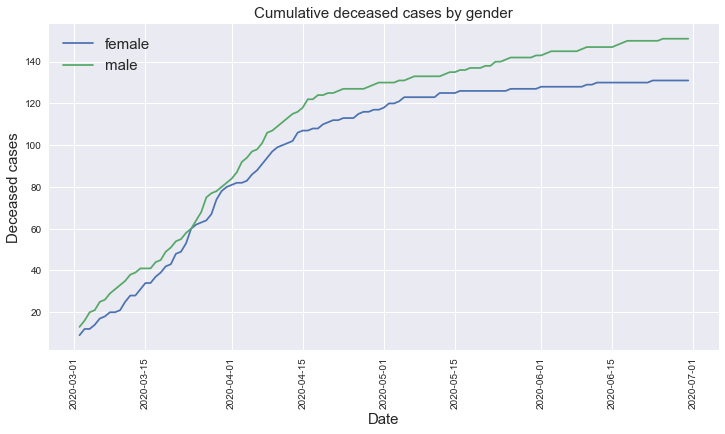

In [33]:
plt.figure(figsize = (12,6))
for group in gender.groupby("sex"):
    plt.plot(group[1].date.values, group[1]["deceased"].values, label = group[0])
    plt.xticks(rotation = 90)
plt.legend(fontsize = 15)
plt.title("Cumulative deceased cases by gender", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Deceased cases", size = 15)
plt.show()

#### Male seems to have a higher rate of death even though it has a lower number of cases as comapred to Female

#### TimeGender Dataset tallies with the cases.csv, not with the patient.csv

#### Using TimeAge.csv

In [34]:
age = pd.read_csv("Python_Project_Data.zip/TimeAge.csv")

In [35]:
age.date = age.date.apply(lambda x: pd.to_datetime(x))

In [36]:
age_latest = age[age.date == max(age.date)]
age_latest

date  time  age  confirmed  deceased
1080 2020-06-30     0   0s        193         0
1081 2020-06-30     0  10s        708         0
1082 2020-06-30     0  20s       3362         0
1083 2020-06-30     0  30s       1496         2
1084 2020-06-30     0  40s       1681         3
1085 2020-06-30     0  50s       2286        15
1086 2020-06-30     0  60s       1668        41
1087 2020-06-30     0  70s        850        82
1088 2020-06-30     0  80s        556       139

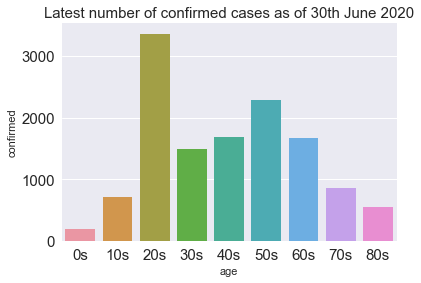

In [37]:
sns.barplot( x = "age", y = "confirmed", data = age_latest)
plt.title("Latest number of confirmed cases as of 30th June 2020", size = 15)
plt.tick_params(axis = "both", labelsize = 15)

### This tallies with the patient.csv although the patient.csv is not complete. 

In [38]:
age["deceased rate"] = age.deceased/age.confirmed * 100.0

In [39]:
age

date  time  age  confirmed  deceased  deceased rate
0    2020-03-02     0   0s         32         0           0.00
1    2020-03-02     0  10s        169         0           0.00
2    2020-03-02     0  20s       1235         0           0.00
3    2020-03-02     0  30s        506         1           0.20
4    2020-03-02     0  40s        633         1           0.16
...         ...   ...  ...        ...       ...            ...
1084 2020-06-30     0  40s       1681         3           0.18
1085 2020-06-30     0  50s       2286        15           0.66
1086 2020-06-30     0  60s       1668        41           2.46
1087 2020-06-30     0  70s        850        82           9.65
1088 2020-06-30     0  80s        556       139          25.00

[1089 rows x 6 columns]

### Deceased Rate

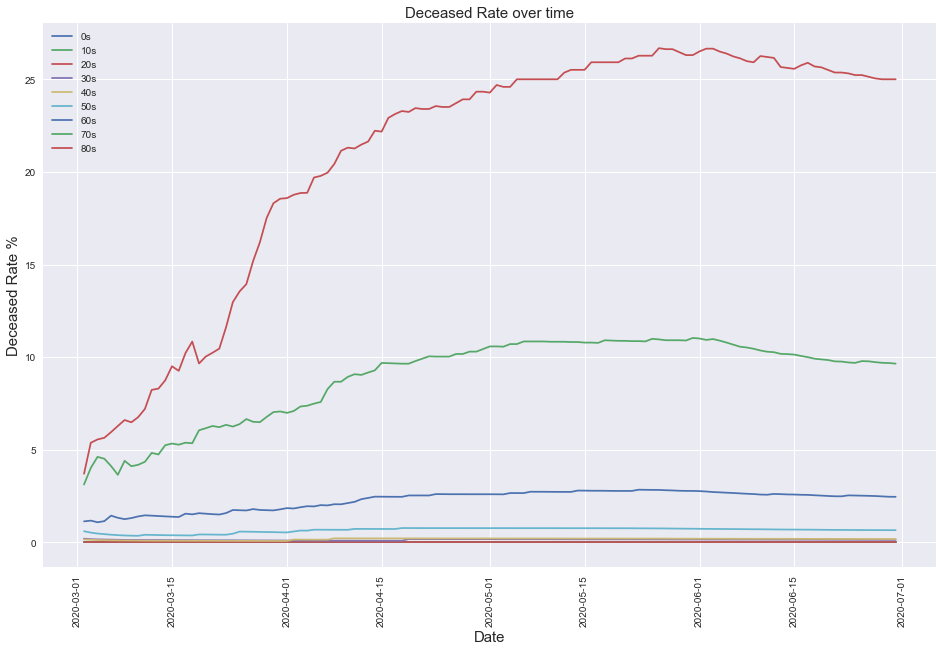

In [40]:
plt.figure(figsize = (16,10))
for group in age.groupby("age"):
    plt.plot(group[1].date.values, group[1]["deceased rate"].values, label = group[0])
    plt.xticks(rotation = 90)
plt.title("Deceased Rate over time", size = 15)
plt.ylabel("Deceased Rate %", size = 15)
plt.xlabel("Date", size = 15)
plt.legend()
plt.show()

### As time goes by, the elderly age group deceased rate has spiked up rapidly

### Lets look into Region

In [41]:
region = pd.read_csv("Python_Project_Data.zip/Region.csv")

In [42]:
region.head()

code province         city  latitude  longitude  elementary_school_count  \
0  10000    Seoul        Seoul     37.57     126.98                      607   
1  10010    Seoul   Gangnam-gu     37.52     127.05                       33   
2  10020    Seoul  Gangdong-gu     37.53     127.12                       27   
3  10030    Seoul   Gangbuk-gu     37.64     127.03                       14   
4  10040    Seoul   Gangseo-gu     37.55     126.85                       36   

   kindergarten_count  university_count  academy_ratio  \
0                 830                48           1.44   
1                  38                 0           4.18   
2                  32                 0           1.54   
3                  21                 0           0.67   
4                  56                 1           1.17   

   elderly_population_ratio  elderly_alone_ratio  nursing_home_count  
0                     15.38                 5.80               22739  
1                     13.17                 4.30                3088  
2                     14.55                 5.40                1023  
3                     19.49                 8.50                 628  
4                     14.39                 5.70                1080

In [43]:
region_elderly_mean = pd.DataFrame(region[region.province != "Korea"].groupby("province")["elderly_population_ratio"].mean().sort_values(ascending = False))
region_elderly_mean

elderly_population_ratio
province                                   
Jeollanam-do                          28.14
Gyeongsangbuk-do                      27.56
Jeollabuk-do                          27.47
Gyeongsangnam-do                      24.75
Chungcheongnam-do                     23.84
Chungcheongbuk-do                     23.19
Gangwon-do                            22.89
Busan                                 19.36
Daegu                                 17.03
Incheon                               16.40
Seoul                                 15.74
Jeju-do                               15.10
Gwangju                               14.81
Gyeonggi-do                           14.43
Daejeon                               14.38
Ulsan                                 11.77
Sejong                                 9.48

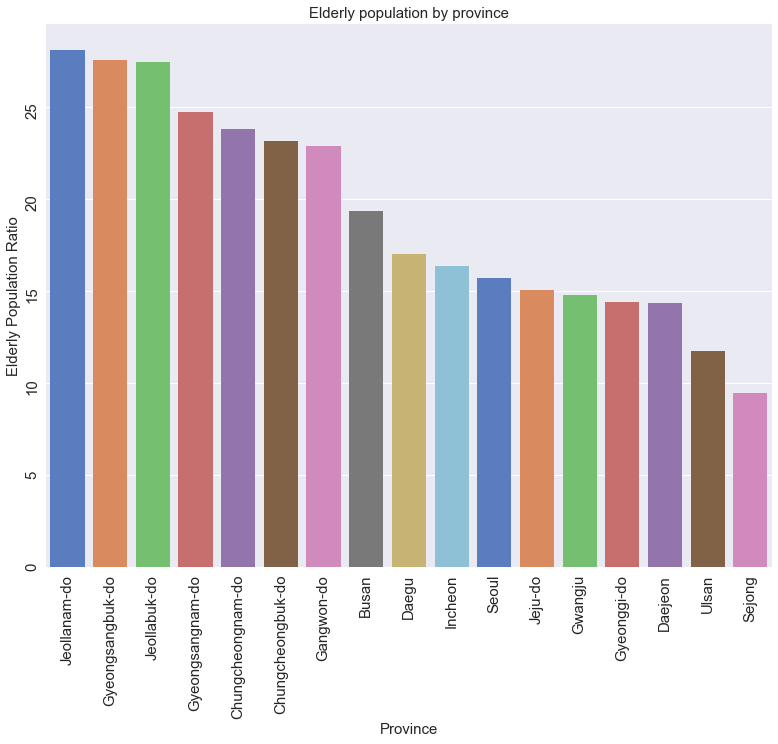

In [44]:
plt.figure(figsize = (13,10))
sns.barplot(x = region_elderly_mean.index, y = region_elderly_mean["elderly_population_ratio"], palette = "muted")
plt.tick_params(axis = "both", labelsize = 15, rotation = 90)
plt.title("Elderly population by province", size = 15)
plt.ylabel("Elderly Population Ratio", size = 15)
plt.xlabel("Province", size = 15)
plt.show()

In [45]:
province_latest.sort_values("confirmed", ascending = False, inplace = True)

In [46]:
region_elderly_mean.loc[province_latest.province,:]

elderly_population_ratio
province                                   
Daegu                                 17.03
Gyeongsangbuk-do                      27.56
Seoul                                 15.74
Gyeonggi-do                           14.43
Incheon                               16.40
Chungcheongnam-do                     23.84
Busan                                 19.36
Gyeongsangnam-do                      24.75
Daejeon                               14.38
Gangwon-do                            22.89
Chungcheongbuk-do                     23.19
Ulsan                                 11.77
Sejong                                 9.48
Gwangju                               14.81
Jeollabuk-do                          27.47
Jeollanam-do                          28.14
Jeju-do                               15.10

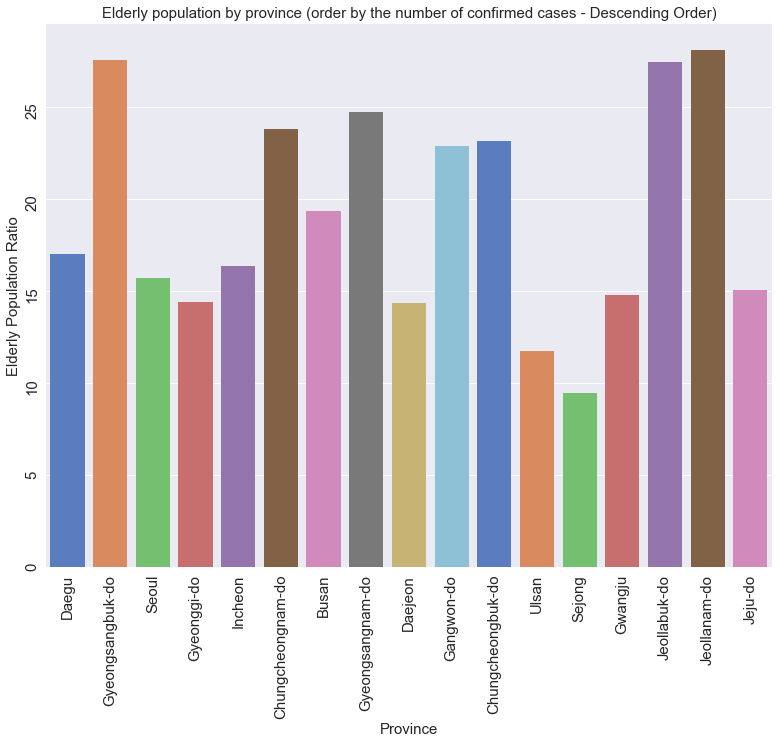

In [47]:
region_elderly_mean.loc[province_latest.province,:]
plt.figure(figsize = (13,10))
sns.barplot(x = region_elderly_mean.loc[province_latest.province,:].index, 
            y = region_elderly_mean.loc[province_latest.province,"elderly_population_ratio"], palette = "muted")
plt.tick_params(axis = "both", labelsize = 15, rotation = 90)
plt.title("Elderly population by province (order by the number of confirmed cases - Descending Order)", size = 15)
plt.ylabel("Elderly Population Ratio", size = 15)
plt.xlabel("Province", size = 15)
plt.show()

### Seems like the elderly population by province is not correlated with the number of confirmed cases